# Data Preprocessing

The quality of the data and the amount of useful information that it contains are key
factors that determine how well a machine learning algorithm can learn. Therefore,
it is absolutely critical to ensure that we examine and preprocess a dataset before
we feed it to a learning algorithm. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
from itertools import combinations

from sklearn.base import clone
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler


sns.set_style()

In [3]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [5]:
# accessing the numpy array from a dataframe object
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

###  Dropping missing values

In [6]:
# dropping missing values across the rows
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
# dropping missing values down each columns
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


disadvantages; for example, we may end up removing too
many samples, which will make a reliable analysis impossible. Or, if we remove too
many feature columns, we will run the risk of losing valuable information that our
classifier needs to discriminate between classes

###  Filling Missing values
This can be done with the pandas **`fillna()`** method or using scikit-learn's **`imputer`** class

In [9]:
# Using SimpleImputer() method
imputed_data = SimpleImputer(strategy='mean').fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [10]:
# using fillna() method
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### Handling Categorical Values

In [11]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']

In [12]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


#### Mapping Function

In [13]:
size_mapping = {
    'XL':3, 'M':1, 'L':2
}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [14]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [15]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [16]:
# Using OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

# Partitioning a dataset into separate training and test datasets

In [17]:
file = '../data/wine/wine.data'
names = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

df_wine = pd.read_csv(file, names=names, header=None)

In [18]:
df_wine.columns = df_wine.columns.str.lower()

In [19]:
df_wine.head()

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
print('class Label');df_wine['class label'].unique()

class Label


array([1, 2, 3])

In [21]:
# making features and label columns
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]
y.shape, X.shape

((178,), (178, 13))

In [22]:
# making Partition 
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((54, 13), (54,), (124, 13), (124,))

#  Feature Scaling
Scale both datasets together, but do not fit the scaling object to the test dataset.

In [23]:
# Using min-max scaling
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

In [24]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

X_train_scaled[:3, :2], X_test_scaled[:3, :2]

(array([[ 0.71225893,  2.22048673],
        [ 0.88229214, -0.70457155],
        [ 0.84585645, -0.73022996]]),
 array([[ 0.89443737, -0.38811788],
        [-1.04879931, -0.77299397],
        [ 1.64744158, -0.41377628]]))

# Feature Selection

In [33]:
lrg = LogisticRegression(penalty='l1', solver='liblinear').fit(X_train_scaled, y_train)
accuracy = lrg.score(X_test_scaled, y_test)
print(f'Test accuracy : {accuracy}')
print(f'Train accuracy : {lrg.score(X_train_scaled, y_train)}')

Test accuracy : 1.0
Train accuracy : 1.0


In [34]:
lrg.intercept_

array([-1.26365532, -1.21587144, -2.3698789 ])

In [27]:
lrg.coef_

array([[ 1.24596051,  0.18056735,  0.74496921, -1.16276915,  0.        ,
         0.        ,  1.16434358,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55265086,  2.50957336],
       [-1.53749782, -0.38740851, -0.99541392,  0.36499593, -0.05935792,
         0.        ,  0.66843235,  0.        ,  0.        , -1.9340527 ,
         1.23371708,  0.        , -2.23156589],
       [ 0.13576312,  0.16844003,  0.35720793,  0.        ,  0.        ,
         0.        , -2.43817986,  0.        ,  0.        ,  1.56380962,
        -0.81884777, -0.49220315,  0.        ]])

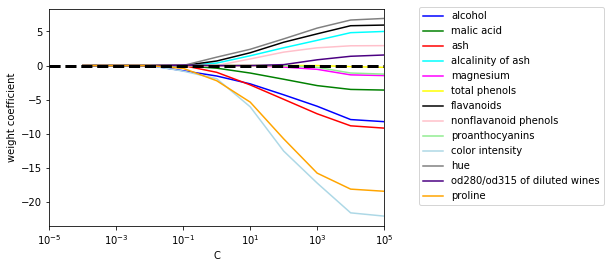

In [28]:
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []

for c in np.arange(-4., 6.):
    lrg = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',multi_class='ovr', random_state=0)
    lrg.fit(X_train_scaled, y_train)
    weights.append(lrg.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
plt.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

In [ ]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
                                                            random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                best = np.argmax(scores)
                self.indices_ = subsets[best]
                self.subsets_.append(self.indices_)
                dim -= 1
                self.scores_.append(scores[best])
                self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        

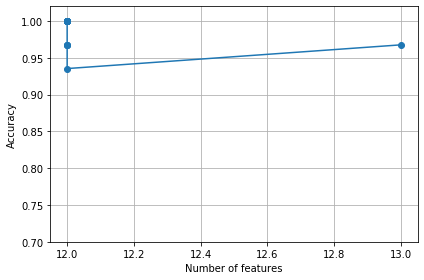

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_scaled, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

##  feature importtance in Random Forest 

In [116]:
indices = np.argsort(imp)[::-1]
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [159]:
feat_label = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1).fit(X_train_scaled, y_train)
imp = forest.feature_importances_
indices = np.argsort(imp)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f+1}  {feat_label[indices[f]]} :\t {round(imp[indices[f]],4)}')

1  proline :	 0.1855
2  flavanoids :	 0.1748
3  color intensity :	 0.1439
4  od280/od315 of diluted wines :	 0.1362
5  alcohol :	 0.1185
6  hue :	 0.0587
7  total phenols :	 0.0509
8  magnesium :	 0.0314
9  malic acid :	 0.0256
10  proanthocyanins :	 0.0256
11  alcalinity of ash :	 0.0224
12  nonflavanoid phenols :	 0.0134
13  ash :	 0.0133


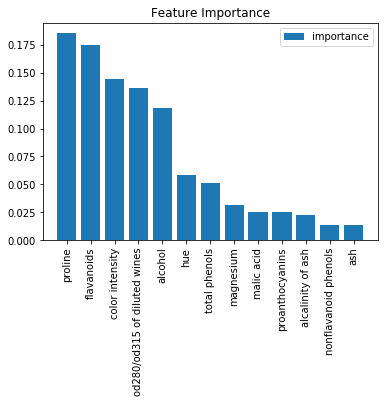

In [168]:
plt.bar(range(X_train.shape[1]), imp[indices], label='importance')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]),feat_label[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.tight_layout()
plt.legend()
plt.show()